# Mynt Advanced Analytics Project for Senior ML Engineers - Chor Eduarte

#### change logs: 
*    mk01:
    * basic 
*    mk02:  
    * add table of contents
    * parse date
    * preprocessing
* mk03: creating models
    * Neural net
    * Decision Trees
    * XGBoost
* mk04: improving the model by adding features
    * merging sales and train dataset

### Table of Contents <a class="anchor" id="toc"></a>

* [Problem Definition](#problemDefinition)
* [Reading the data](#readingTheData)
* [Data Exploration and Visualization](#EDA)
* [Data Pre-processing](#preprocessing)
* [Data Partition](#dataPartition)
* [Fit Model](#fitModel)
    * [Neural Network](#neural)
    * [Random Forest](#randomForest)
    * [XGBoost](#xgboost)
* [Model Evaluation](#modelEvaluation)

## Problem Definition<a class="anchor" id="problemDefinition"></a>
* [back to toc](#toc)

Rossmann is Germany's second-largest drug store chain. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column. Note that some stores in the dataset were temporarily closed for refurbishment

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## Reading the data <a class="anchor" id="readingTheData"></a>
* [back to toc](#toc)

In [2]:
dataset = pd.read_csv('./dataset/train.csv',parse_dates=[2])
df_store = pd.read_csv('./dataset/store.csv')

C:\Users\reved\AppData\Local\Temp\ipykernel_10516\3423031158.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./dataset/train.csv',parse_dates=[2])


In [3]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0
...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## DATA EXPLORATION AND VISUALIZATION <a class="anchor" id="EDA"></a>
* [back to toc](#toc)

In [5]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [6]:
dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1
914628,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
dataset.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [8]:
df_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [9]:
#check for null values
dataset.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Luckily we do not have null values in our dataset :)

In [11]:
#check the correlation for the data
dataset.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005667,0.024734,-0.000129,0.000068,0.000041
DayOfWeek,-0.000008,1.000000,-0.461340,-0.386934,-0.530936,-0.393894,-0.205699
Sales,0.005667,-0.461340,1.000000,0.896073,0.675924,0.454348,0.076103
Customers,0.024734,-0.386934,0.896073,1.000000,0.615638,0.318701,0.064592
Open,-0.000129,-0.530936,0.675924,0.615638,1.000000,0.297299,0.075490
Promo,0.000068,-0.393894,0.454348,0.318701,0.297299,1.000000,0.055323
SchoolHoliday,0.000041,-0.205699,0.076103,0.064592,0.075490,0.055323,1.000000


<AxesSubplot:>

<Figure size 1440x1872 with 0 Axes>

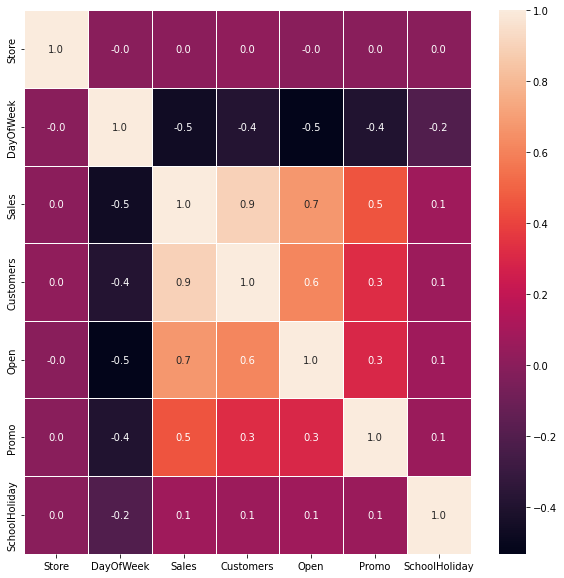

In [12]:
fig = plt.figure(figsize=(20,26))

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<AxesSubplot:>

<Figure size 1440x1872 with 0 Axes>

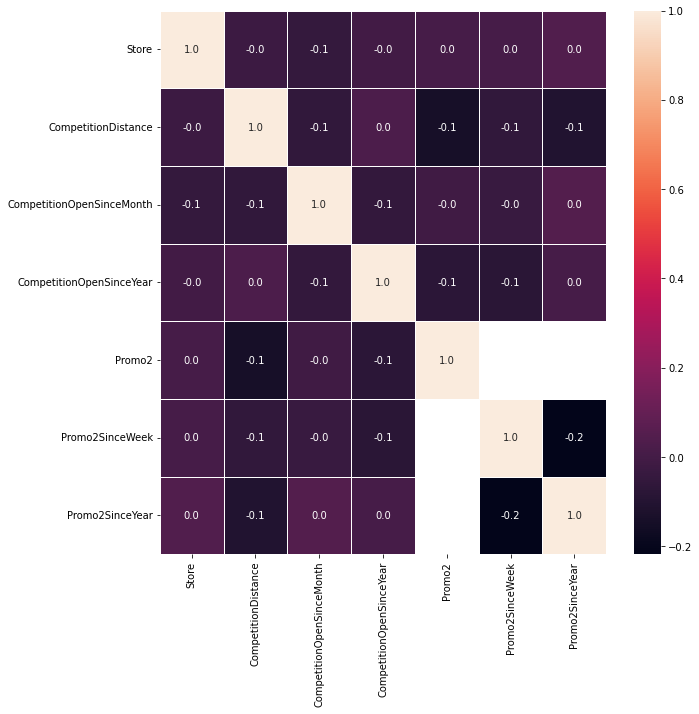

In [13]:
fig = plt.figure(figsize=(20,26))

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_store.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

We can see in our heatmap that <b>Sales</b> is directly proportional with <b>Customers</b> with 0.9 score. Next is <b>Open</b>, with 0.7.

Another notable correlation is <b>Promo</b> which is likely to increase <b>Sales</b>

In [14]:
dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000
mean,558.477923,3.996935,5755.722525,634.081021,0.830830,0.380417,0.180269
std,321.912653,1.998012,3842.448149,464.756658,0.374902,0.485489,0.384411
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3711.000000,404.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5715.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7826.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38722.000000,7388.000000,1.000000,1.000000,1.000000


In [15]:
# sns.scatterplot(data=dataset, x="DayOfWeek", y="Sales", hue="Promo")

## Data Pre-processing<a class="anchor" id="preprocessing"></a>
* [back to toc](#toc)

### Train Dataset

In [16]:
dataset.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [17]:
dataset['Month'] = dataset.Date.dt.month
dataset['Year'] = dataset.Date.dt.year
dataset['Day'] = dataset.Date.dt.day
dataset['WeekOfYear'] = dataset.Date.dt.isocalendar().week

In [18]:
#check unique values for StateHoliday column
dataset['StateHoliday'].unique()

array(['0', 'b', 'a', 'c', 0], dtype=object)

In [19]:
#perform encoding on StateHoliday column

dataset.loc[dataset['StateHoliday'] == '0', 'StateHoliday'] = 0
dataset.loc[dataset['StateHoliday'] == 'a', 'StateHoliday'] = 1
dataset.loc[dataset['StateHoliday'] == 'b', 'StateHoliday'] = 2
dataset.loc[dataset['StateHoliday'] == 'c', 'StateHoliday'] = 3

In [20]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,WeekOfYear
0,1,4,2015-04-30,6228,650,1,1,0,0,4,2015,30,18
1,2,4,2015-04-30,6884,716,1,1,0,0,4,2015,30,18
2,3,4,2015-04-30,9971,979,1,1,0,0,4,2015,30,18
3,4,4,2015-04-30,16106,1854,1,1,0,0,4,2015,30,18
4,5,4,2015-04-30,6598,729,1,1,0,0,4,2015,30,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914625,1112,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914626,1113,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914627,1114,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1


In [21]:
dataset['StateHoliday'] = dataset['StateHoliday'].astype(int)
dataset['WeekOfYear'] = dataset['WeekOfYear'].astype(int)

### Store dataset

In [23]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
#check unique values for StoreType column
df_store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [25]:
#perform encoding on StateHoliday column

df_store.loc[df_store['StoreType'] == 'a', 'StoreType'] = 0
df_store.loc[df_store['StoreType'] == 'b', 'StoreType'] = 1
df_store.loc[df_store['StoreType'] == 'c', 'StoreType'] = 2
df_store.loc[df_store['StoreType'] == 'd', 'StoreType'] = 3

In [26]:
#check unique values for Assortment column
df_store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [27]:
#perform encoding on StateHoliday column

df_store.loc[df_store['Assortment'] == 'a', 'Assortment'] = 0
df_store.loc[df_store['Assortment'] == 'b', 'Assortment'] = 1
df_store.loc[df_store['Assortment'] == 'c', 'Assortment'] = 2


In [28]:
#replace null values of dataframe with 0
df_store = df_store.fillna(0)

In [29]:
df_store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [30]:
df_store.dtypes

Store                          int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

## Merge dataset

In [31]:
merged_df = pd.merge(dataset, df_store, on='Store')


In [32]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-04-30,6228,650,1,1,0,0,4,...,18,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,3,2015-04-29,5775,579,1,1,0,0,4,...,18,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,2,2015-04-28,5199,552,1,1,0,0,4,...,18,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,1,2015-04-27,5575,574,1,1,0,0,4,...,18,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,7,2015-04-26,0,0,0,0,0,0,4,...,17,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914624,1115,6,2013-01-05,4771,339,1,0,0,1,1,...,1,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
914625,1115,5,2013-01-04,4540,326,1,0,0,1,1,...,1,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
914626,1115,4,2013-01-03,4297,300,1,0,0,1,1,...,1,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
914627,1115,3,2013-01-02,3697,305,1,0,0,1,1,...,1,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [33]:
merged_df.shape

(914629, 22)

In [34]:
merged_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int32
SchoolHoliday                         int64
Month                                 int64
Year                                  int64
Day                                   int64
WeekOfYear                            int32
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [35]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'Year', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## Data Partition<a class="anchor" id="dataPartition"></a>
* [back to toc](#toc)

    

In [36]:
X_cols = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'Year', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear']

In [37]:
y_cols = ['Sales']

In [41]:
X = merged_df[X_cols]
X.shape


(914629, 19)

In [42]:
y = merged_df[y_cols]
y.shape

(914629, 1)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [44]:
X_train

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,4,650,1,1,0,0,4,2015,30,18,2,0,1270.0,9.0,2008.0,0,0.0,0.0
1,1,3,579,1,1,0,0,4,2015,29,18,2,0,1270.0,9.0,2008.0,0,0.0,0.0
2,1,2,552,1,1,0,0,4,2015,28,18,2,0,1270.0,9.0,2008.0,0,0.0,0.0
3,1,1,574,1,1,0,0,4,2015,27,18,2,0,1270.0,9.0,2008.0,0,0.0,0.0
4,1,7,0,0,0,0,0,4,2015,26,17,2,0,1270.0,9.0,2008.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731698,893,4,834,1,0,0,1,10,2013,31,44,0,0,130.0,0.0,0.0,1,1.0,2013.0
731699,893,3,847,1,0,0,1,10,2013,30,44,0,0,130.0,0.0,0.0,1,1.0,2013.0
731700,893,2,744,1,0,0,1,10,2013,29,44,0,0,130.0,0.0,0.0,1,1.0,2013.0
731701,893,1,844,1,0,0,1,10,2013,28,44,0,0,130.0,0.0,0.0,1,1.0,2013.0


In [45]:
y_train

,Sales
0,6228
1,5775
2,5199
3,5575
4,0
...,...
731698,5853
731699,6014
731700,5193
731701,6262


## Fit Model<a class="anchor" id="fitModel"></a>
* [back to toc](#toc)

### Neural Network<a class="anchor" id="neural"></a>
* [back to toc](#toc)

In [46]:
# from keras.models import Sequential
# from keras.layers import Dense
# from numpy import asarray

In [47]:
# # get the model
# def get_model(n_inputs, n_outputs):
#     model = Sequential()
#     model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
#     model.compile(loss='mae', optimizer='adam',metrics='accuracy')
#     return model

In [48]:
# # load dataset
# n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# # get model
# model = get_model(n_inputs, n_outputs)
# # fit the model on all data
# # model.fit(X_train, y_train, verbose=1, epochs=100)


### Random Forest<a class="anchor" id="randomForest"></a>
* [back to toc](#toc)

In [49]:
# from sklearn.ensemble import RandomForestRegressor

In [50]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from math import sqrt

In [51]:
# # Random Forest

# rf_params = {
#     'n_estimators': 100,
#     'criterion': 'absolute_error'
# }

# rf = RandomForestRegressor(**`rf_params)

# rf.fit(X_train, y_train.values.ravel())



In [52]:
# rf_preds_train = rf.predict(X_train)


In [53]:
# rf_preds_val = rf.predict(X_test)


In [54]:
# train_mae_values['rf'] = mean_absolute_error(y_true=y_train, y_pred=rf_preds_train)
# val_mae_values['rf'] = mean_absolute_error(y_true=y_val, y_pred=rf_preds_val)

In [55]:
# #Random Forest

# yrf_pred = rf.predict(x_train)

# print('Mean Absolute Error = {}'.format(mean_absolute_error(y_train, yrf_pred)))
# print('Root Mean Squared Error = {}'.format(sqrt(mean_squared_error(y_train, yrf_pred))))
# print('R Squared Score = {}'.format(r2_score(y_train, yrf_pred)))

### XGBoost<a class="anchor" id="xgboost"></a>
* [back to toc](#toc)

In [56]:
from xgboost import XGBRegressor 
from sklearn.metrics import accuracy_score

C:\Users\reved\anaconda3\envs\gcashEnv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [63]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000
#                      , max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8
                    )


In [64]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20
)


[0]	validation_0-rmse:4947.10596	validation_1-rmse:4822.24951
[1]	validation_0-rmse:3570.11157	validation_1-rmse:3465.24194
[2]	validation_0-rmse:2626.79907	validation_1-rmse:2548.22632
[3]	validation_0-rmse:1994.49500	validation_1-rmse:1936.07153
[4]	validation_0-rmse:1578.56775	validation_1-rmse:1565.25586
[5]	validation_0-rmse:1317.74048	validation_1-rmse:1345.12671
[6]	validation_0-rmse:1149.52686	validation_1-rmse:1224.87317
[7]	validation_0-rmse:1053.99255	validation_1-rmse:1157.21741
[8]	validation_0-rmse:989.45020	validation_1-rmse:1130.84924
[9]	validation_0-rmse:941.81335	validation_1-rmse:1105.43591
[10]	validation_0-rmse:915.87421	validation_1-rmse:1088.35535
[11]	validation_0-rmse:883.19965	validation_1-rmse:1083.19751
[12]	validation_0-rmse:862.71631	validation_1-rmse:1072.08069
[13]	validation_0-rmse:842.89526	validation_1-rmse:1076.69800
[14]	validation_0-rmse:836.04626	validation_1-rmse:1074.18518
[15]	validation_0-rmse:824.52557	validation_1-rmse:1075.85950
[16]	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 



Target on train data [6055.932    5258.8755   5075.41     ... 5014.285    5777.1987
  -50.047905]


In [60]:
predict_train

array([6055.932   , 5258.8755  , 5075.41    , ..., 5014.285   ,
       5777.1987  ,  -50.047905], dtype=float32)

In [61]:
y_train

,Sales
0,6228
1,5775
2,5199
3,5575
4,0
...,...
731698,5853
731699,6014
731700,5193
731701,6262


In [65]:
# import pickle
# pickle.dump(model,open('model.pkl','wb'))